# Variáveis aleatórias multidimensionais

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>

**Exemplo:** Um jogador de futebol irá participar de uma partida e sua posição depende da estratégia definida pelo treinador. Se ele jogar no ataque, a probabilidade de fazer gols tem distribuição de Poisson com taxa igual a 2 gols por jogo. Se atuar no meio de campo, a taxa é de um gol por jogo.  Assuma que a probabilidade do jogador atuar no ataque é igual a 2/3 e no meio de campo, 1/3.  Qual é o número esperado de gols que o jogador fará durante a temporada?


In [1]:
import numpy as np
np.random.seed(10)
p = 2/3 # probabilidade de jogar no ataque
lbd1 = 1 # taxa de gols no meio do campo
lbd2 = 2 # taxa de gols no ataque
ns = 1000 # número de simulações
goals = 0 # número de gols
for s in range(0,ns):
    if (np.random.uniform() < p):
        # jogador joga no ataque
        goals = goals + np.random.poisson(lbd2)
    else:
        # jogador joga no meio do campo
        goals = goals + np.random.poisson(lbd1)
print("E[X] = ", goals/ns)

E[X] =  1.632


## Correlação

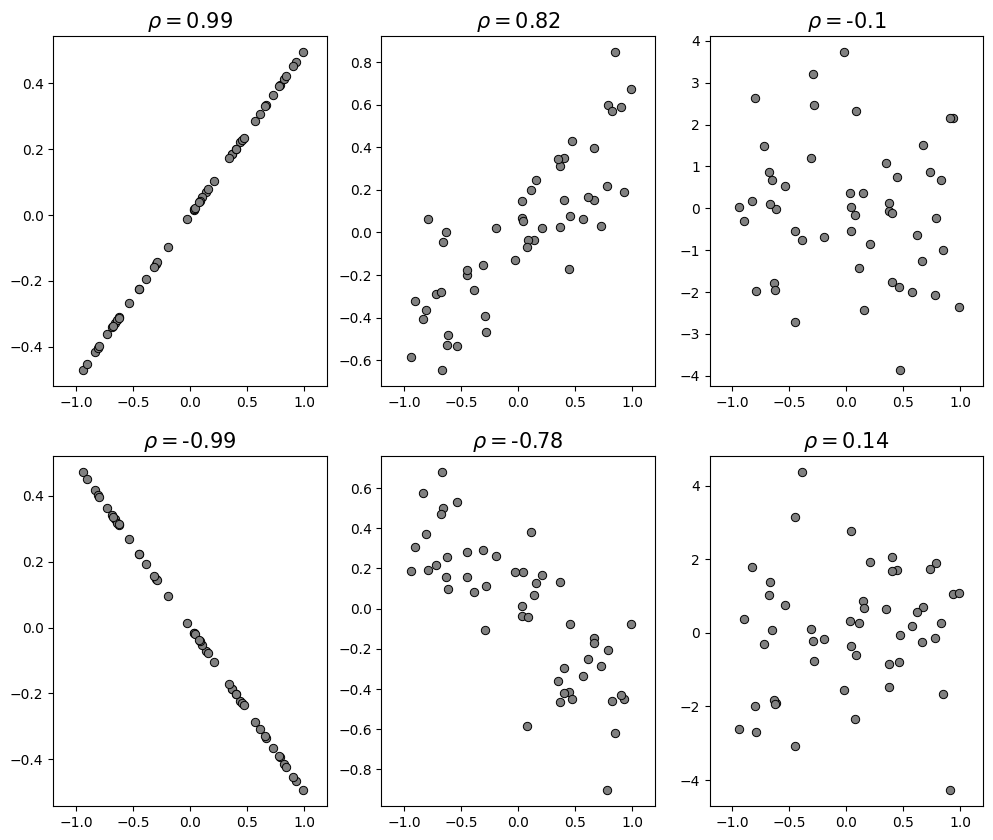

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


np.random.seed(101)
N = 50 # número de amostras
X = np.random.uniform(-1,1,N)
# valores das variâncias
sigma = [0,0.2,1.5,0,0.2,1.5]
# coeficente de inclinação
a = [0.5,0.5,0.5,-0.5,-0.5,-0.5]
plt.figure(figsize=(12,10))
for i in range(0,len(a)):
    # gera os dados
    Y = a[i]*X + np.random.normal(0,sigma[i],N)
    # mostra os gráficos
    plt.subplot(2,3,i+1)
    plt.plot(X,Y, color = 'gray',
             marker='o', linestyle='None',
             markeredgewidth = 0.7,
             markeredgecolor = 'black')
    plt.xlim(-1.2,1.2)
    # calcula o coeficiente de correlação de Pearson
    corr, p_value = pearsonr(X, Y)
    # mostra apenas duas casas decimais
    corr = int(corr*100)/100
    plt.title(r'$\rho=$'+ str(corr), fontsize=15)
plt.savefig('corr.svg')
plt.show(True)

Comparação entre os coeficientes de Pearson e Spearman.

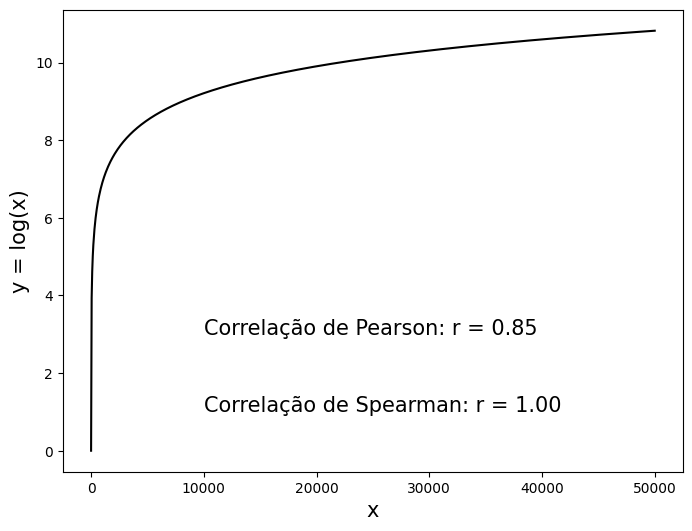

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 1000 # tamanho da amostra
x = np.linspace(1, 50000, N)
y = np.log(x)
# mostra os dados
plt.figure(figsize=(8,6))
plt.plot(x, y, 'k-')
plt.xlabel("x", fontsize = 15)
plt.ylabel("y = log(x)", fontsize = 15)
corr, p_value = pearsonr(x, y) # correlação de Pearson
corrs, p_values = spearmanr(x, y) # correlação de Spearman
st = 'Correlação de Pearson: '+ "r = {:.2f}".format(corr)
plt.text(10000,3, st, fontsize=15)
st = 'Correlação de Spearman: '+ "r = {:.2f}".format(corrs)
plt.text(10000,1, st, fontsize=15)
plt.show()

Correlação nos dados da flor iris.

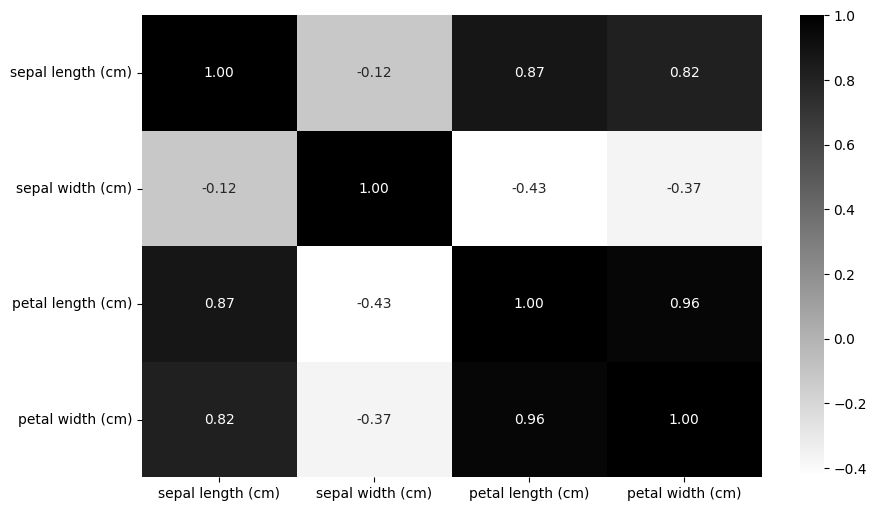

In [5]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# carrega os dados
iris = datasets.load_iris()
# transforma em um dataframe do Pandas
df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)
# mostra as correlações
hm = sns.heatmap(df.corr(), annot = True,
                 cmap='gist_gray_r', fmt='.2f')
plt.savefig('corr2.svg')
plt.show()

A correlação de Spearman entre o comprimento e a largura da pétala da flor iris.

In [6]:
import pandas as pd
from sklearn import datasets
from scipy.stats import spearmanr, pearsonr

# carrega os dados
iris = datasets.load_iris()
# transforma em um dataframe do Pandas
df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)
# comprimento da pétala ('petal length')
X = df[iris.feature_names[2]]
# largura da pétala ('petal width')
Y = df[iris.feature_names[3]]
corrp, p_value_p = pearsonr(X, Y) # correlação de Pearson
print('Correlação de Pearson:', corrp)
corrs, p_value_s = spearmanr(X, Y) # correlação de Spearman
print('Correlação de Spearman:', corrs)

Correlação de Pearson: 0.962865431402796
Correlação de Spearman: 0.9376668235763412
